In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import pairwise_distances

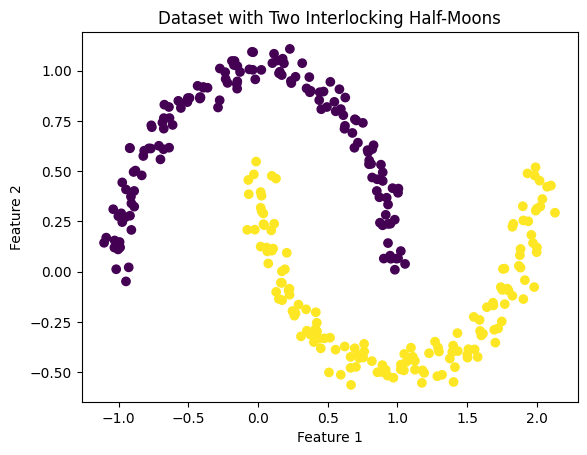

In [3]:
# Generate the dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dataset with Two Interlocking Half-Moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
def rbf_kernel(X, gamma=1.0):
    # Compute the pairwise distances
    pairwise_dists = pairwise_distances(X, metric='euclidean')
    
    # Apply the RBF kernel
    K = np.exp(-gamma * pairwise_dists ** 2)
    
    return K

# Construct the similarity graph
gamma = 1.0
similarity_graph = rbf_kernel(X, gamma=gamma)

In [5]:
def compute_laplacian(similarity_graph):
    # Compute the degree matrix
    degree_matrix = np.diag(np.sum(similarity_graph, axis=1))
    
    # Compute the Laplacian matrix
    laplacian_matrix = degree_matrix - similarity_graph
    
    return laplacian_matrix

# Compute the Laplacian matrix
laplacian_matrix = compute_laplacian(similarity_graph)

In [16]:
def eigen_decomposition(laplacian_matrix, n_clusters):
    # Convert Laplacian matrix to a PyTorch tensor
    laplacian_tensor = torch.tensor(laplacian_matrix, dtype=torch.float32)
    
    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = torch.linalg.eig(laplacian_tensor)#, eigenvectors=True)
    
    # Select the eigenvectors corresponding to the smallest eigenvalues
    eigenvectors = eigenvectors[:, :n_clusters]
    
    return eigenvectors

n_clusters = 2
embedding = eigen_decomposition(laplacian_matrix, n_clusters)
# print(embedding.shape)
embedding = torch.real(embedding)

In [17]:
from sklearn.cluster import KMeans

# Perform K-Means clustering in the embedded space
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embedding.detach().numpy())

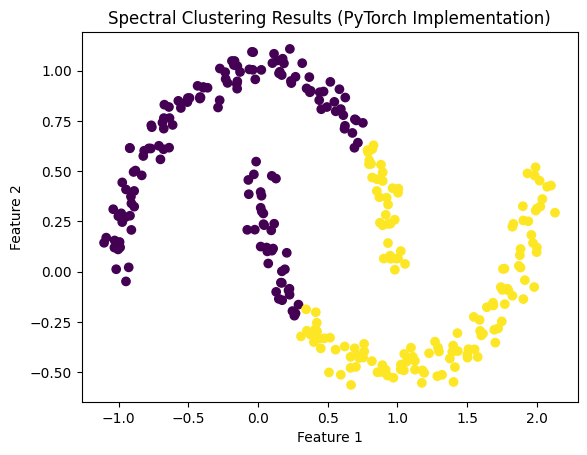

In [18]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering Results (PyTorch Implementation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()